In [1]:
import sys
sys.path.append('..')

from utils.plotting import *

%matplotlib inline

/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.

In [2]:
baseline_loc = '../results/mnist/seeker/final/baseline.txt'
with open(baseline_loc) as f:
    baseline = float(f.read())
print('Baseline accuracy: {:.2f}%'.format(baseline * 100))

Baseline accuracy: 98.85%


In [3]:
# Deterministic
experiment_dir = '../logs/mnist/hns/deterministic/full_training_10/'
det_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)
det_batch_logs = load_and_process_batch_logs_from_dir(experiment_dir)

# ST1
experiment_dir = '../logs/mnist/hns/stochastic/st1/full_training_10/'
st1_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)
st1_batch_logs = load_and_process_batch_logs_from_dir(experiment_dir)

# ST2
experiment_dir = '../logs/mnist/hns/stochastic/st1/full_training_10/'
st2_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)
st2_batch_logs = load_and_process_batch_logs_from_dir(experiment_dir)

# SA-0.1
experiment_dir = '../logs/mnist/hns/stochastic/sa/rate_0.1/full_training_10/'
sa_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)
sa_batch_logs = load_and_process_batch_logs_from_dir(experiment_dir)

W0910 02:34:36.944756 140696772540160 deprecation.py:323] From /home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/summary/summary_iterator.py:68: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


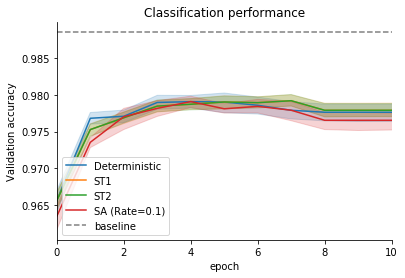

In [4]:
sns.lineplot(x='step', y='Validation accuracy', data=pd.concat(det_epoch_logs), label='Deterministic')
sns.lineplot(x='step', y='Validation accuracy', data=pd.concat(st1_epoch_logs), label='ST1')
sns.lineplot(x='step', y='Validation accuracy', data=pd.concat(st2_epoch_logs), label='ST2')
sns.lineplot(x='step', y='Validation accuracy', data=pd.concat(sa_epoch_logs), label='SA (Rate=0.1)')

plt.plot(sa_epoch_logs[0]['step'], [baseline] * len(sa_epoch_logs[0]), 
         label='baseline', c='0.5', ls='--')

plt.legend(loc='lower left')
plt.xlabel('epoch')

plt.title('Classification performance')

plt.xlim([0, 10])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
sns.lineplot(x='step', y='percentage hidden', data=pd.concat(det_batch_logs), label='Deterministic')
sns.lineplot(x='step', y='percentage hidden', data=pd.concat(st1_batch_logs), label='ST1')
sns.lineplot(x='step', y='percentage hidden', data=pd.concat(st2_batch_logs), label='ST2')
sns.lineplot(x='step', y='percentage hidden', data=pd.concat(sa_batch_logs), label='SA (Rate=0.1)')

plt.legend(loc='lower left')
plt.xlabel('epoch')

plt.title('Masking performance')

plt.xlim([0, 10])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

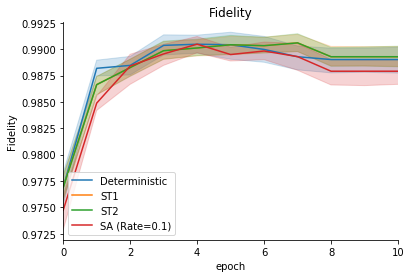

In [5]:
sns.lineplot(x='step', y='Fidelity', data=pd.concat(det_epoch_logs), label='Deterministic')
sns.lineplot(x='step', y='Fidelity', data=pd.concat(st1_epoch_logs), label='ST1')
sns.lineplot(x='step', y='Fidelity', data=pd.concat(st2_epoch_logs), label='ST2')
sns.lineplot(x='step', y='Fidelity', data=pd.concat(sa_epoch_logs), label='SA (Rate=0.1)')

plt.legend(loc='lower left')
plt.xlabel('epoch')

plt.title('Fidelity')

plt.xlim([0, 10])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

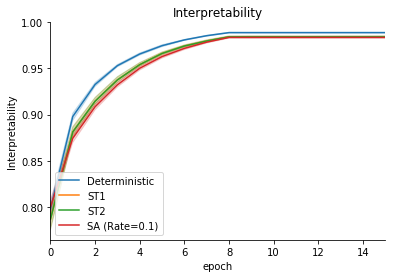

In [6]:
sns.lineplot(x='step', y='Interpretability', data=pd.concat(det_epoch_logs), label='Deterministic')
sns.lineplot(x='step', y='Interpretability', data=pd.concat(st1_epoch_logs), label='ST1')
sns.lineplot(x='step', y='Interpretability', data=pd.concat(st2_epoch_logs), label='ST2')
sns.lineplot(x='step', y='Interpretability', data=pd.concat(sa_epoch_logs), label='SA (Rate=0.1)')

plt.legend(loc='lower left')
plt.xlabel('epoch')

plt.title('Interpretability')

plt.xlim([0, 15])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

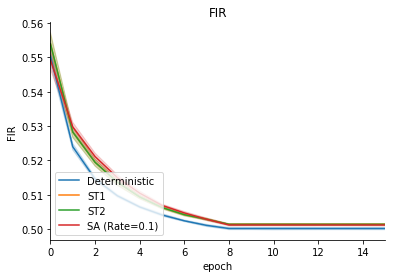

In [7]:
sns.lineplot(x='step', y='FIR', data=pd.concat(det_epoch_logs), label='Deterministic')
sns.lineplot(x='step', y='FIR', data=pd.concat(st1_epoch_logs), label='ST1')
sns.lineplot(x='step', y='FIR', data=pd.concat(st2_epoch_logs), label='ST2')
sns.lineplot(x='step', y='FIR', data=pd.concat(sa_epoch_logs), label='SA (Rate=0.1)')

plt.legend(loc='lower left')
plt.xlabel('epoch')

plt.title('FIR')

plt.xlim([0, 15])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

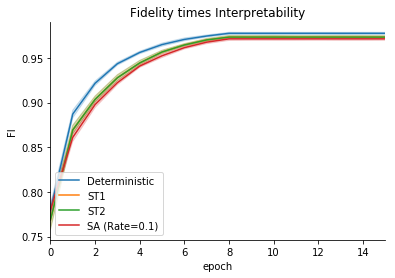

In [11]:
det = pd.concat(det_epoch_logs)
st1 = pd.concat(st1_epoch_logs)
st2 = pd.concat(st2_epoch_logs)
sa = pd.concat(sa_epoch_logs)

det['FI'] = det['Fidelity'] * det['Interpretability']
st1['FI'] = st1['Fidelity'] * st1['Interpretability']
st2['FI'] = st2['Fidelity'] * st2['Interpretability']
sa['FI'] = sa['Fidelity'] * sa['Interpretability']

sns.lineplot(x='step', y='FI', data=det, label='Deterministic')
sns.lineplot(x='step', y='FI', data=st1, label='ST1')
sns.lineplot(x='step', y='FI', data=st2, label='ST2')
sns.lineplot(x='step', y='FI', data=sa, label='SA (Rate=0.1)')

plt.legend(loc='lower left')
plt.xlabel('epoch')

plt.title('Fidelity times Interpretability')

plt.xlim([0, 15])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [13]:
print(det['FI'].max())
print(st1['FI'].max())
print(st2['FI'].max())
print(sa['FI'].max())

0.9801587922763808
0.9778900993666753
0.9778900993666753
0.9744473195635521


In [16]:
best_epoch = det['FI'].idxmax()
print('Best Fidelity:        ', det['Fidelity'].iloc[best_epoch] * 100)
print('Best Interpretability:', det['Interpretability'].iloc[best_epoch] * 100)
print('Best FIR:             ', det['FIR'].iloc[best_epoch])

Best Fidelity:         99.1898775100708
Best Interpretability: 98.7598717212677
Best FIR:              0.5010861754417419
